<a href="https://colab.research.google.com/github/RahulV-31/Python/blob/main/TItanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Required Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# For handling missing values
from sklearn.impute import SimpleImputer

#2. Loading the Data


In [2]:
# Load Titanic dataset
titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows of the dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Descriptive Statistics of data

In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#3. Basic EDA Tasks

a. Analyzing survival rate by gender, class, and embarkation point

In [6]:
# Survival rate by gender
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print('Survival rate by gender', gender_survival)

# Survival rate by class
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print('\nSurvival rate by class', class_survival)

# Survival rate by embarkation point
embarkation_survival = titanic_df.groupby('Embarked')['Survived'].mean()
print('\nSurvival rate by embarkation point', embarkation_survival)


Survival rate by gender Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by class Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by embarkation point Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


b. Checking correlations between features (Age, Fare, Survival)


               Age      Fare  Survived
Age       1.000000  0.096067 -0.077221
Fare      0.096067  1.000000  0.257307
Survived -0.077221  0.257307  1.000000


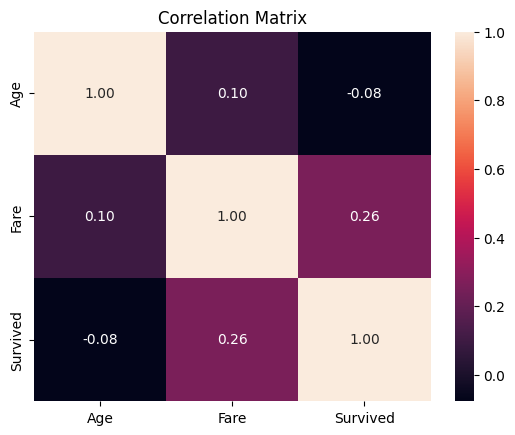

In [7]:
# Correlation matrix
correlation_matrix = titanic_df[['Age', 'Fare', 'Survived']].corr()
print(correlation_matrix)

# Visualize correlation matrix using heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#4. Data Cleaning

a. Handling Missing Values


In [8]:
# Check missing values
missing_values = titanic_df.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
# Fill missing Age values with the median
imputer = SimpleImputer(strategy='median')
titanic_df['Age'] = imputer.fit_transform(titanic_df[['Age']])

# Fill missing Embarked values with the most frequent value (mode)
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop rows with missing Cabin values (as it's too many missing)
titanic_df.drop(columns='Cabin', inplace=True)

# Check missing values again
missing_values_after = titanic_df.isnull().sum()
print(missing_values_after)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


b. Encoding Categorical Variables


In [10]:
# Encoding 'Sex' using Label Encoding
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

# Encoding 'Embarked' using Label Encoding
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])

# Verify encoding
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


#5. Visualization

a. Bar plot for survival rates by gender, class, and embarkation point

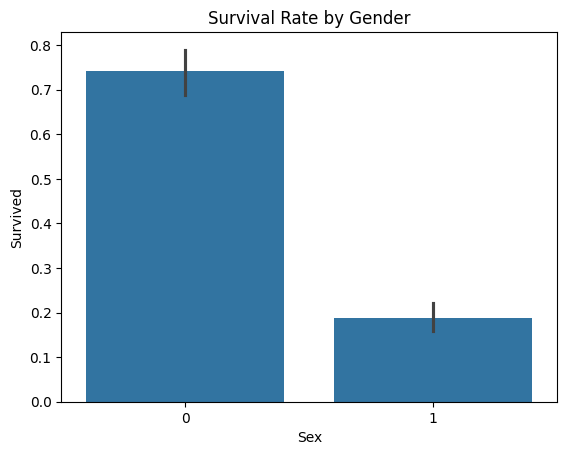

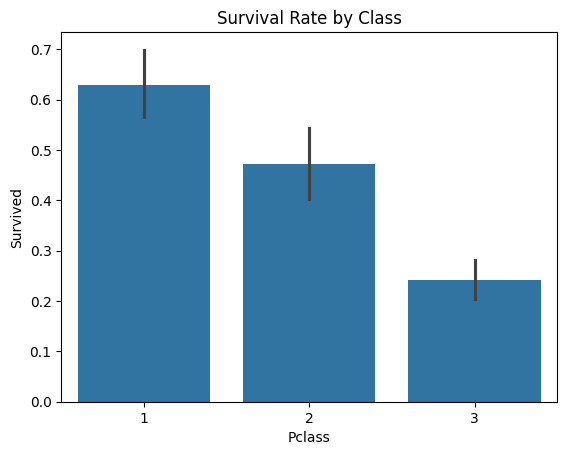

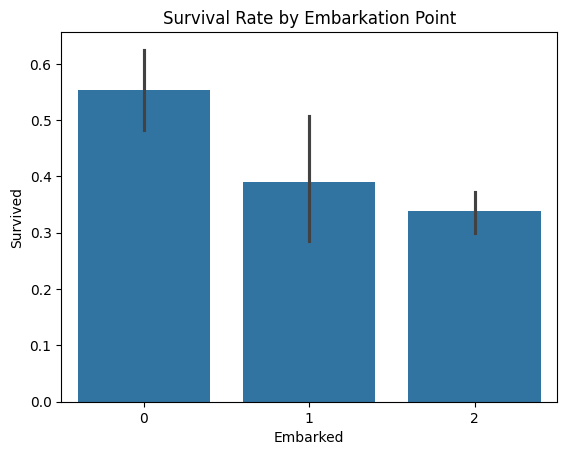

In [11]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

# Survival rate by class
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by embarkation point
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarkation Point')
plt.show()


b. Box plot for age distributions by class


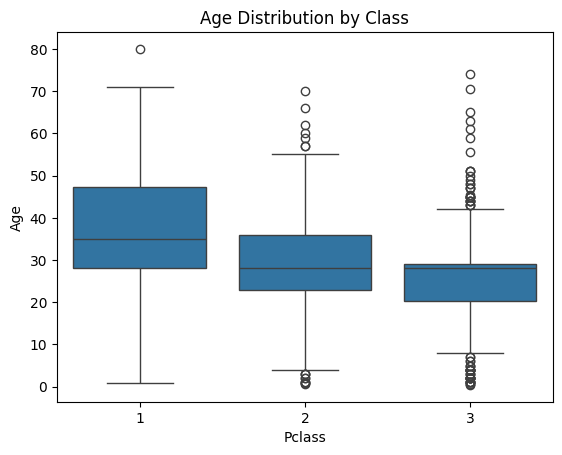

In [12]:
# Box plot for Age by Pclass
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Age Distribution by Class')
plt.show()

The apparent outliers in the Age distribution represent actual passengers, including very young children (infants, toddlers) and elderly individuals, which are valid and expected in the context of Titanic passengers. Removing them would distort the true representation of the population on board.


c. Additional Visualization (Survival by Age and Fare)


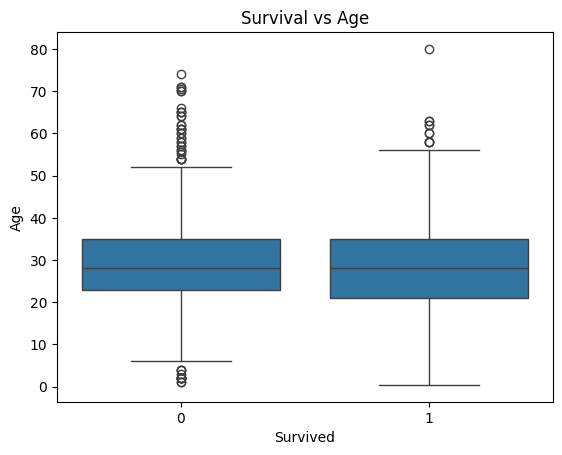

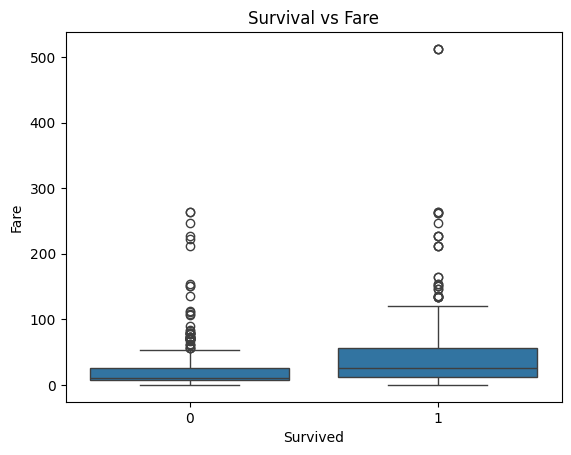

In [13]:
# Plotting survival rate by Age
sns.boxplot(x='Survived', y='Age', data=titanic_df)
plt.title('Survival vs Age')
plt.show()

# Plotting survival rate by Fare
sns.boxplot(x='Survived', y='Fare', data=titanic_df)
plt.title('Survival vs Fare')
plt.show()

#6. Advanced EDA

a. Pairplot to explore relationships between numeric features


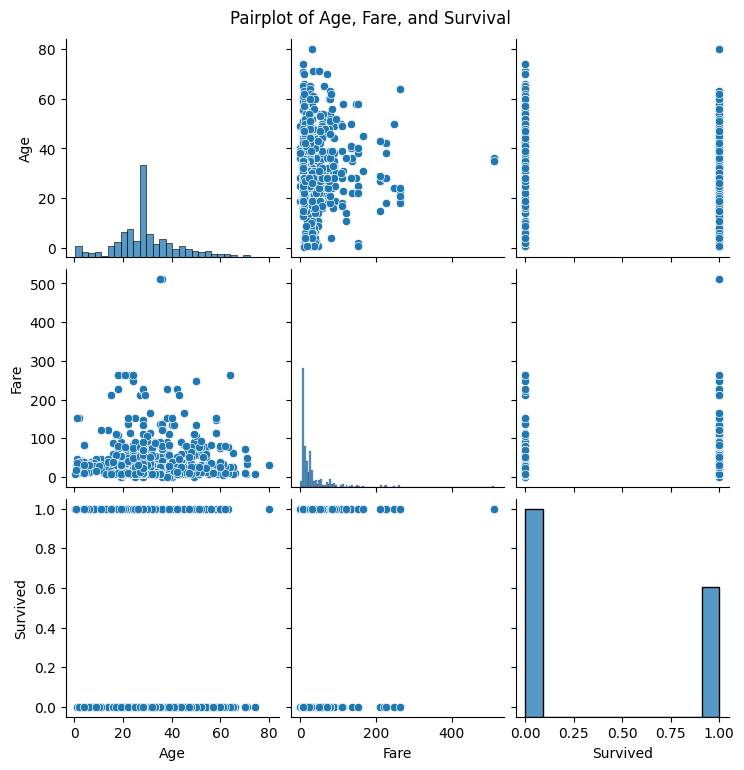

In [14]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(titanic_df[['Age', 'Fare', 'Survived']])
plt.suptitle('Pairplot of Age, Fare, and Survival', y=1.02)
plt.show()

b. Violin plot for Age and Survival

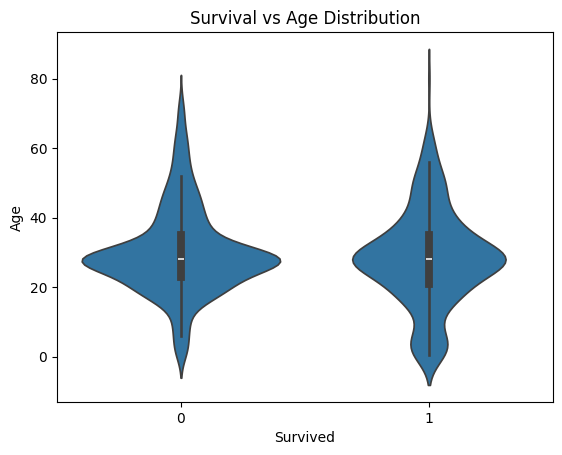

In [15]:
# Violin plot for Age vs Survival
sns.violinplot(x='Survived', y='Age', data=titanic_df)
plt.title('Survival vs Age Distribution')
plt.show()

#7. Save Cleaned Data

In [16]:
# Save the cleaned data to a new CSV file
titanic_df.to_csv('cleaned_titanic_data.csv', index=False)

From the Titanic dataset, we observed that survival rates varied across different passenger classes, genders, and embarkation points. Females had a higher survival rate than males, and first-class passengers had the highest survival rates compared to second and third class. Age also played an important role, with children having a greater likelihood of survival compared to elderly passengers, who were less likely to make it. Overall, survival on the Titanic depended heavily on these factors, with women, children, and wealthier passengers having the best chances of survival.